# Housing Prices Analysis in Boston, MA

---



 You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

try:
    df = pd.read_csv('boston_housing.csv')
except FileNotFoundError:
    print("Error: 'boston_housing.csv' not found. Please provide the correct file name.")
    exit()
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

df['CHAS'] = df['CHAS'].astype(bool)

median_values_by_river = df.groupby('CHAS')['MEDV'].median()
print("\nMedian house values by Charles River:\n", median_values_by_river)

group1 = df[df['CHAS'] == True]['MEDV']
group2 = df[df['CHAS'] == False]['MEDV']

t_statistic, p_value = stats.ttest_ind(group1, group2)
print("\nT-test Results (Charles River proximity):")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("There is a statistically significant difference in median house values based on Charles River proximity.")
else:
  print("There is no statistically significant difference in median house values based on Charles River proximity.")

df['INDUS_Category'] = pd.cut(df['INDUS'], bins=4, labels=['Low', 'Medium', 'High', 'VeryHigh']) #Example bins

median_values_by_owner_occupied = df.groupby('INDUS_Category')['MEDV'].median()

print("\nMedian house values by proportion of owner-occupied units (Illustrative Example):\n", median_values_by_owner_occupied)

groups = [df[df['INDUS_Category'] == cat]['MEDV'] for cat in median_values_by_owner_occupied.index]
f_statistic, p_value = stats.f_oneway(*groups)

print("\nF-test (ANOVA):")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in median house values across different proportion of owner-occupied categories.")
else:
    print("There is no statistically significant difference in median house values across different proportion of owner-occupied categories.")


Median house values by Charles River:
 CHAS
False    20.9
True     23.3
Name: MEDV, dtype: float64

T-test Results (Charles River proximity):
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a statistically significant difference in median house values based on Charles River proximity.

Median house values by proportion of owner-occupied units (Illustrative Example):
 INDUS_Category
Low         25.15
Medium      20.40
High        15.40
VeryHigh    17.40
Name: MEDV, dtype: float64

F-test (ANOVA):
F-statistic: 61.72192347289437
P-value: 5.55519236903891e-34
There is a statistically significant difference in median house values across different proportion of owner-occupied categories.


<ipython-input-2-97ec5f47c551>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values_by_owner_occupied = df.groupby('INDUS_Category')['MEDV'].median()


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df['AGE_Category'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['Low', 'Medium', 'High'])

median_values_by_age = boston_df.groupby('AGE_Category')['MEDV'].median()
print("\nMedian house values by proportion of owner-occupied units built before 1940:\n", median_values_by_age)

groups = [boston_df[boston_df['AGE_Category'] == cat]['MEDV'] for cat in median_values_by_age.index]
f_statistic, p_value = stats.f_oneway(*groups)

print("\nF-test (ANOVA) for AGE categories:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in median house values across different age categories.")
else:
    print("There is no statistically significant difference in median house values across different age categories.")

correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\nCorrelation between Nitric oxide concentrations and proportion of non-retail business acres:")
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("There is no statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")

correlation_coefficient, p_value = stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

print("\nCorrelation between weighted distance to employment centers and median house value:")
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant relationship between weighted distance to employment centers and median house value.")
else:
    print("There is no statistically significant relationship between weighted distance to employment centers and median house value.")


Median house values by proportion of owner-occupied units built before 1940:
 AGE_Category
Low       24.8
Medium    22.6
High      18.2
Name: MEDV, dtype: float64

F-test (ANOVA) for AGE categories:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a statistically significant difference in median house values across different age categories.

Correlation between Nitric oxide concentrations and proportion of non-retail business acres:
Correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
There is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.

Correlation between weighted distance to employment centers and median house value:
Correlation coefficient: 0.2499287340859039
P-value: 1.2066117273371067e-08
There is a statistically significant relationship between weighted distance to employment centers and median house value.


<ipython-input-3-7ff3481ddecb>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values_by_age = boston_df.groupby('AGE_Category')['MEDV'].median()


Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

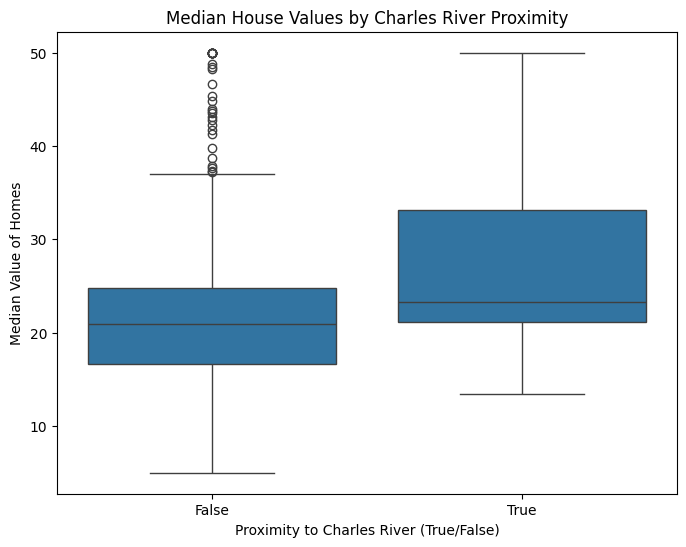

<ipython-input-4-61eaa91617e5>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AGE_Category', y='MEDV', data=boston_df, ci=None) #ci=None removes confidence intervals for cleaner visual


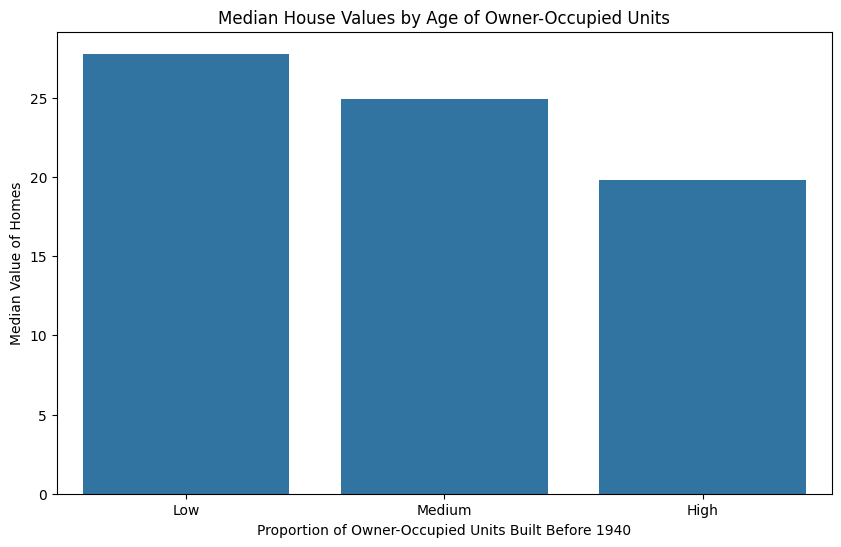

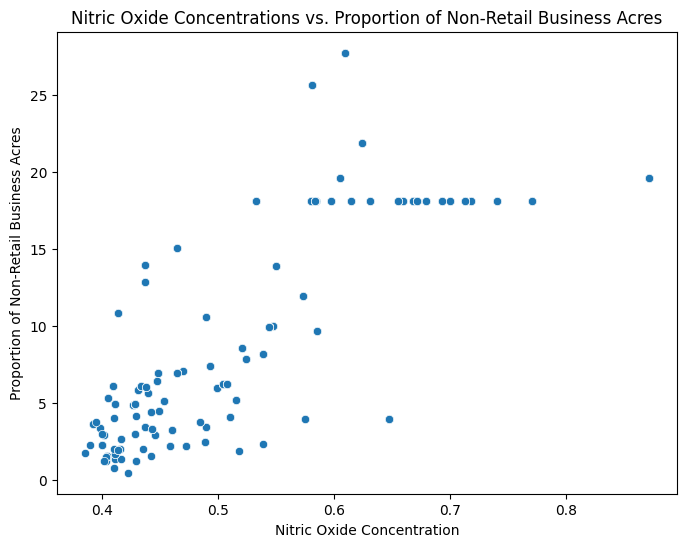

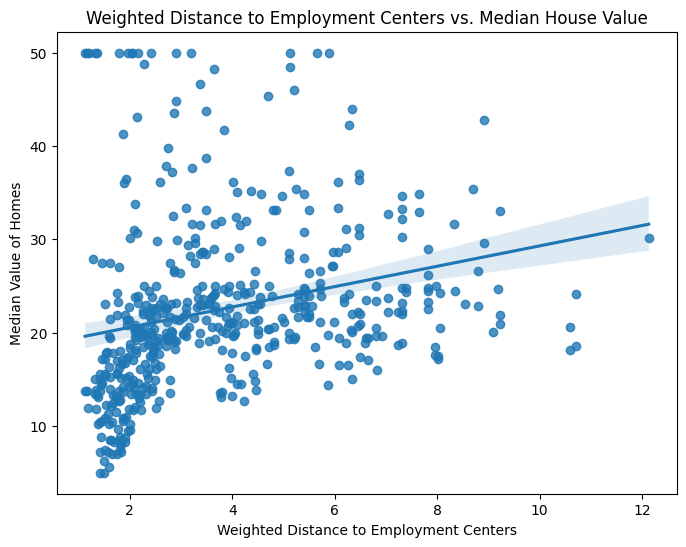

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('Median House Values by Charles River Proximity')
plt.xlabel('Proximity to Charles River (True/False)')
plt.ylabel('Median Value of Homes')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE_Category', y='MEDV', data=boston_df, ci=None)
plt.title('Median House Values by Age of Owner-Occupied Units')
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
plt.ylabel('Median Value of Homes')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Weighted Distance to Employment Centers vs. Median House Value')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Homes')
plt.show()

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000'

# Task 2: Generate Descriptive Statistics and Visualizations


For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

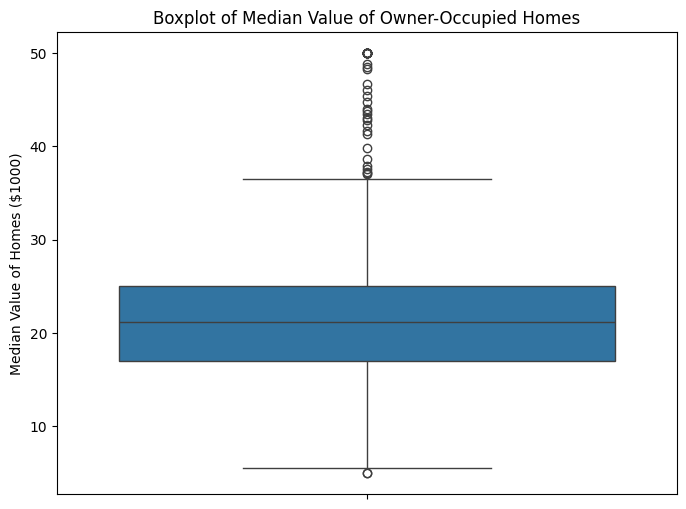

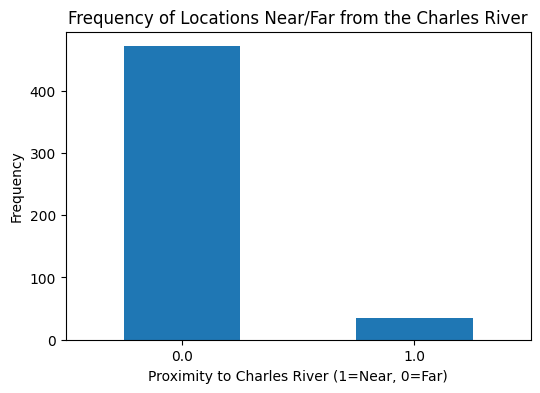

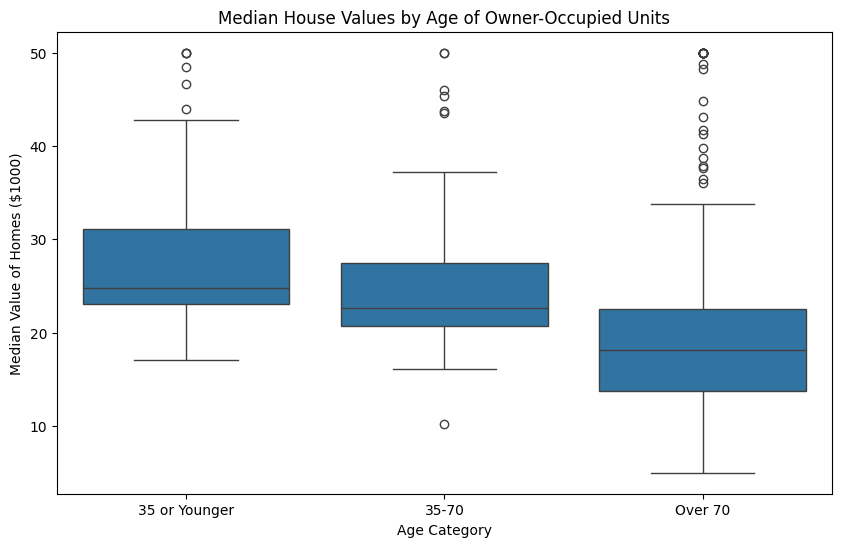

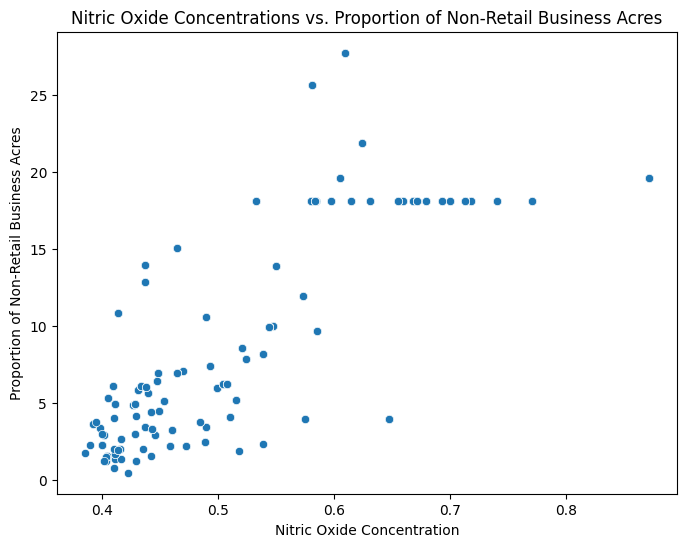

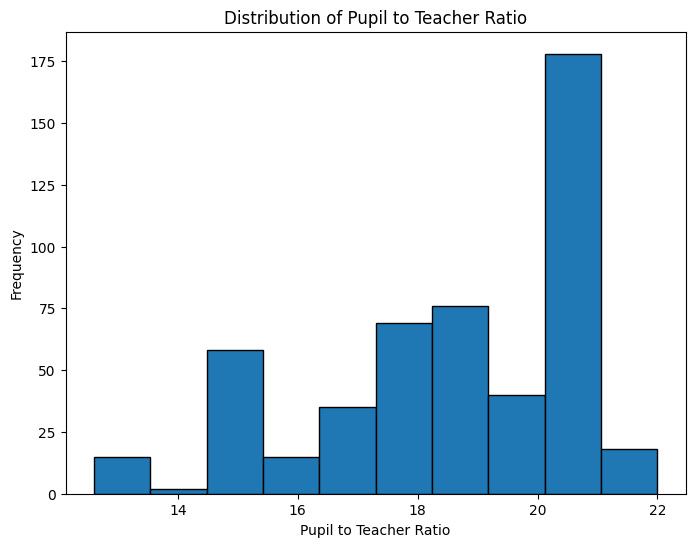

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

plt.figure(figsize=(6, 4))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Frequency of Locations Near/Far from the Charles River')
plt.xlabel('Proximity to Charles River (1=Near, 0=Far)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

boston_df['AGE_Category'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 or Younger', '35-70', 'Over 70'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Category', y='MEDV', data=boston_df)
plt.title('Median House Values by Age of Owner-Occupied Units')
plt.xlabel('Age Category')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Distribution of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [7]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("\nT-test for difference in Median values based on Charles River:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05

if p_value < alpha:
  print("Reject H0: There is a significant difference in median house values based on Charles River proximity.")
else:
  print("Fail to reject H0: There is no significant difference in median house values based on Charles River proximity.")

# ANOVA test
groups = [boston_df[boston_df['AGE_Category'] == cat]['MEDV'] for cat in boston_df['AGE_Category'].unique()]
f_statistic, p_value = stats.f_oneway(*groups)

print("\nANOVA Test for difference in Median values based on AGE:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject H0: There is a statistically significant difference in median house values across different age categories.")
else:
    print("Fail to reject H0: There is no statistically significant difference in median house values across different age categories.")

# Pearson correlation
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation between NOX and INDUS:")
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject H0: There is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("Fail to reject H0: There is no statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")

import statsmodels.formula.api as sm

# Fit the linear regression model
model = sm.ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())

# Check p-value for DIS
if model.pvalues['DIS'] < alpha:
  print("Reject H0.  There is a statistically significant relationship between weighted distance to employment centers and median house value")
else:
  print("Fail to reject H0. There is no statistically significant relationship between weighted distance to employment centers and median house value")


T-test for difference in Median values based on Charles River:
T-statistic: 3.113291312794837
P-value: 0.0035671700981375174
Reject H0: There is a significant difference in median house values based on Charles River proximity.

ANOVA Test for difference in Median values based on AGE:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject H0: There is a statistically significant difference in median house values across different age categories.

Pearson Correlation between NOX and INDUS:
Correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
Reject H0: There is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squa

In [8]:
import statsmodels.formula.api as sm

# Fit the linear regression model
model = sm.ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())

# Check the p-value for DIS
alpha = 0.05
if model.pvalues['DIS'] < alpha:
    print("Reject H0. There is a statistically significant linear relationship between weighted distance to employment centers and median house value.")
    print("The coefficient for DIS indicates the impact of an additional unit of weighted distance on the median house value.")
else:
    print("Fail to reject H0. There is no statistically significant linear relationship between weighted distance to employment centers and median house value.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:51:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0